In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("Data_Train.xlsx")

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.shape

(10683, 11)

In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
def change_dtime(df,col):
  for i in col:
    df[i] = pd.to_datetime(df[i])

In [ ]:
cols = ["Dep_Time","Arrival_Time","Date_of_Journey"]
change_dtime(data,cols)

In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
cat_cols = [col for col in data.columns if data[col].dtype == "object"]
num_cols = [col for col in data.columns if data[col].dtype !="object"]

In [ ]:
cat_cols = data[cat_cols]

In [ ]:
num_cols = data[num_cols]

In [ ]:
cat_cols.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [ ]:
num_cols.columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Price'], dtype='object')

In [ ]:
durations = []

for i in cat_cols["Duration"]:
  if len(i) < 4:
    durations.append(i+" "+"00m")
  else:
    durations.append(i)



In [ ]:
cat_cols["Duration"] = durations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cat_cols["Duration"]

0         2h 50m
1         7h 25m
2        19h 00m
3         5h 25m
4         4h 45m
          ...   
10678     2h 30m
10679     2h 35m
10680     3h 00m
10681     2h 40m
10682     8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
num_cols["Journey_day"] = num_cols["Date_of_Journey"].dt.day
num_cols["Journey_month"] = num_cols["Date_of_Journey"].dt.month
num_cols["Journey_year"] = num_cols["Date_of_Journey"].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
num_cols.drop("Date_of_Journey",axis =1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
num_cols.head()

,Dep_Time,Arrival_Time,Price,Journey_day,Journey_month,Journey_year
0,2022-01-19 22:20:00,2022-03-22 01:10:00,3897,24,3,2019
1,2022-01-19 05:50:00,2022-01-19 13:15:00,7662,5,1,2019
2,2022-01-19 09:25:00,2022-06-10 04:25:00,13882,6,9,2019
3,2022-01-19 18:05:00,2022-01-19 23:30:00,6218,5,12,2019
4,2022-01-19 16:50:00,2022-01-19 21:35:00,13302,3,1,2019


In [ ]:
def extract_time(df,cols):
  for col in cols:
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_min"] = df[col].dt.minute
def drop_col(df,cols):
  for col in cols:
    df.drop(col,axis=1,inplace=True)

In [ ]:
cols =["Arrival_Time","Dep_Time"]

In [ ]:
extract_time(num_cols,cols)

In [ ]:
drop_col(num_cols,cols)

In [ ]:
num_cols.head(2)

,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,3897,24,3,2019,1,10,22,20
1,7662,5,1,2019,13,15,5,50


In [ ]:
cat_cols.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info


In [ ]:
# Data preprocessing


In [ ]:
duration_hour = []
duration_min  = []

def duration_hr(df,col):
  for i in df[col]:
    if len(i.split(" ")[0]) == 2:
      duration_hour.append(int(i[:1]))
    else:
      duration_hour.append(int(i[:2]))

def duration_mi(df,col):
  for i in df[col]:
    if len(i.split(" ")[1]) == 3:
      duration_min.append(int(i.split(" ")[1][:2]))
    else:
      duration_min.append(int(i.split(" ")[1][:1]))

    


In [ ]:
duration_hr(cat_cols,"Duration")

In [ ]:
duration_mi(cat_cols,"Duration")

In [ ]:
duration_hour[:8]

[2, 7, 19, 5, 4, 2, 15, 21]

In [ ]:
duration_min[:10]

[50, 25, 0, 25, 45, 25, 30, 5, 30, 50]

In [ ]:
cat_cols["Duration_hour"] = duration_hour
cat_cols["Duration_min"] = duration_min

In [ ]:
cols = ["Duration_hour","Duration_min"]

In [ ]:
drop_col(cat_cols,cols)

In [ ]:
cat_cols.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Duration_hour', 'Duration_min'],
      dtype='object')

In [ ]:
cat_cols.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
dtype: object

In [ ]:
num_cols = pd.concat([num_cols,cat_cols[["Duration_hour","Duration_min"]]],axis=1)

In [ ]:
num_cols

,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,3897,24,3,2019,1,10,22,20,2,50
1,7662,5,1,2019,13,15,5,50,7,25
2,13882,6,9,2019,4,25,9,25,19,0
3,6218,5,12,2019,23,30,18,5,5,25
4,13302,3,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,2019,22,25,19,55,2,30
10679,4145,27,4,2019,23,20,20,45,2,35
10680,7229,27,4,2019,11,20,8,20,3,0
10681,12648,3,1,2019,14,10,11,30,2,40


In [ ]:
num_cols.to_csv("num_cols_plane.csv")

In [ ]:
cat_cols.to_csv("cat_cols_plane.csv")

In [ ]:
 num_cols = pd.read_csv("num_cols_plane.csv")
 cat_cols = pd.read_csv("cat_cols_plane.csv")

In [ ]:
num_cols.head(2)

,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,3897,24,3,2019,1,10,22,20,2,50
1,7662,5,1,2019,13,15,5,50,7,25


In [ ]:
cat_cols.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info


In [ ]:
routes = [i.split("→") for i in cat_cols["Route"] ]

In [ ]:
routes[:10]

[['BLR ', ' DEL'],
 ['CCU ', ' IXR ', ' BBI ', ' BLR'],
 ['DEL ', ' LKO ', ' BOM ', ' COK'],
 ['CCU ', ' NAG ', ' BLR'],
 ['BLR ', ' NAG ', ' DEL'],
 ['CCU ', ' BLR'],
 ['BLR ', ' BOM ', ' DEL'],
 ['BLR ', ' BOM ', ' DEL'],
 ['BLR ', ' BOM ', ' DEL'],
 ['DEL ', ' BOM ', ' COK']]

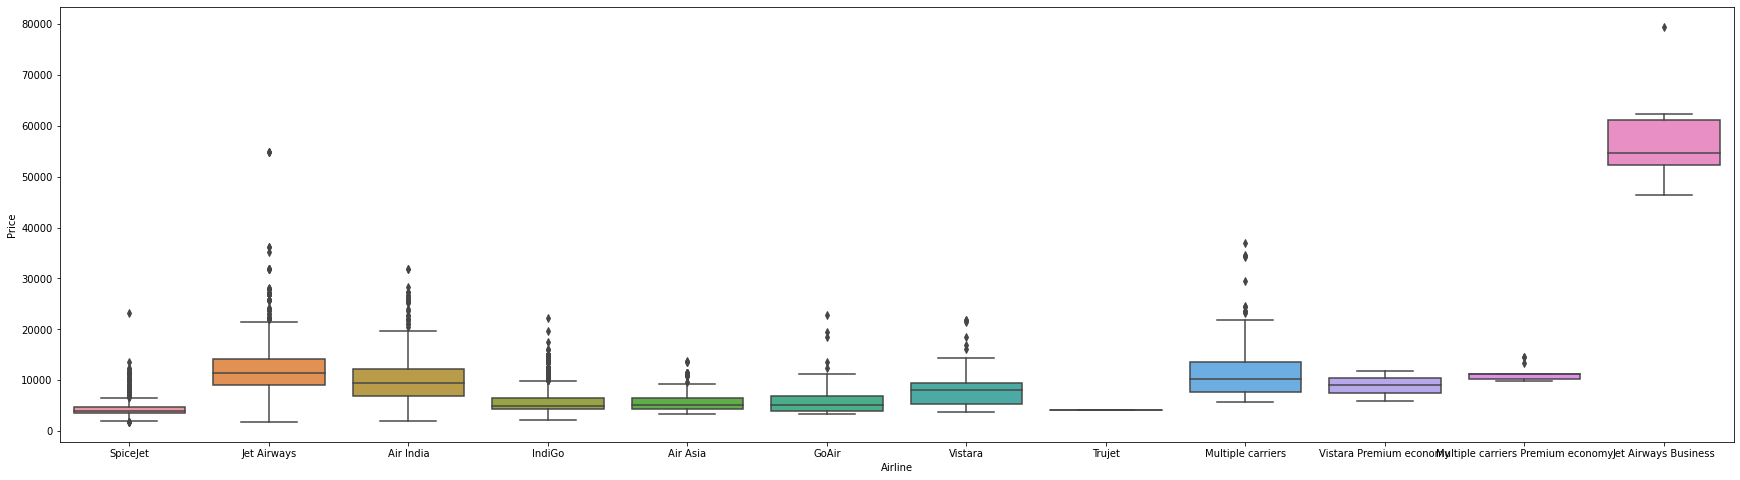

In [ ]:
plt.figure(figsize = (30,8))
sns.boxplot(x = "Airline",y = "Price", data = data.sort_values("Price",ascending = True))

In [ ]:
cat_cols["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
Airline = pd.get_dummies(cat_cols["Airline"],drop_first=True)

In [ ]:
cat_cols = pd.concat([Airline,cat_cols],axis=1)

In [ ]:
cat_cols.drop("Airline",axis=1,inplace=True)

In [ ]:
source = pd.get_dummies(cat_cols["Source"],drop_first=True)

In [ ]:
cat_cols = pd.concat([source,cat_cols],axis=1)

In [ ]:
cat_cols.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
cat_cols.head(2)

,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Destination,Route,Total_Stops,Additional_Info
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,New Delhi,BLR → DEL,non-stop,No info
1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,Banglore,CCU → IXR → BBI → BLR,2 stops,No info


In [ ]:
destination= pd.get_dummies(cat_cols["Destination"],drop_first=True)

In [ ]:
cat_cols = pd.concat([destination,cat_cols],axis=1)

In [ ]:
cat_cols.drop("Destination",axis=1,inplace=True)

In [ ]:
cat_cols.head(2)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route,Total_Stops,Additional_Info
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,BLR → DEL,non-stop,No info
1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,CCU → IXR → BBI → BLR,2 stops,No info


In [ ]:
cat_cols["Route_1"] = cat_cols["Route"].str.split("→").str[0]
cat_cols["Route_2"] = cat_cols["Route"].str.split("→").str[1]
cat_cols["Route_3"] = cat_cols["Route"].str.split("→").str[2]
cat_cols["Route_4"] = cat_cols["Route"].str.split("→").str[3]
cat_cols["Route_5"] = cat_cols["Route"].str.split("→").str[4]

In [ ]:
cat_cols.fillna("No_info",axis=1,inplace=True)

In [ ]:
cat_cols.isnull().sum()

Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Route                                0
Total_Stops                          0
Additional_Info                      0
Route_1                              0
Route_2                              0
Route_3                  

In [ ]:
cat_cols.head(5)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,non-stop,No info,BLR,DEL,No_info,No_info,No_info
1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2 stops,No info,CCU,IXR,BBI,BLR,No_info
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2 stops,No info,DEL,LKO,BOM,COK,No_info
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1 stop,No info,CCU,NAG,BLR,No_info,No_info
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1 stop,No info,BLR,NAG,DEL,No_info,No_info


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
cols = ["Route_1","Route_2","Route_3","Route_4","Route_5"]
for i in cols:
  cat_cols[i] = encoder.fit_transform(cat_cols[i])

In [ ]:
cat_cols.head(3)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,non-stop,No info,0,13,29,13,5
1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2 stops,No info,2,25,1,3,5
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2 stops,No info,3,32,4,5,5


In [ ]:
cat_cols["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
data = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
cat_cols["Total_Stops"] = cat_cols["Total_Stops"].map(data)

In [ ]:
cat_cols.head(3)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,No info,0,13,29,13,5
1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,No info,2,25,1,3,5
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,No info,3,32,4,5,5


In [ ]:
cat_cols.drop("Additional_Info",axis=1,inplace=True)

In [ ]:
data = pd.concat([cat_cols,num_cols],axis=1)

In [ ]:
data.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Unnamed: 0,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13,29,13,5,0,3897,24,3,2019,1,10,22,20,2,50
1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,25,1,3,5,1,7662,5,1,2019,13,15,5,50,7,25
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3,32,4,5,5,2,13882,6,9,2019,4,25,9,25,19,0
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,34,3,13,5,3,6218,5,12,2019,23,30,18,5,5,25
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,34,8,13,5,4,13302,3,1,2019,21,35,16,50,4,45


In [ ]:
def plot(df,col):
  fig,(ax1,ax2) = plt.subplots(2,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


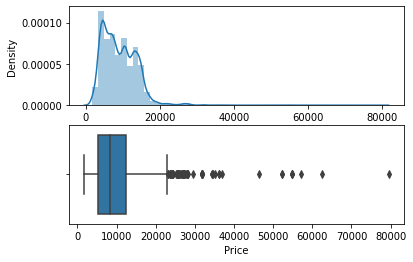

In [ ]:
plot(data,"Price")

In [ ]:
data["Price"] = np.where(data["Price"]>=40000,data["Price"].median(),data["Price"])

In [ ]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
x = data.drop("Price",axis=1)
y = data["Price"]

In [ ]:
x.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13,29,13,5,24,3,2019,1,10,22,20,2,50
1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,25,1,3,5,5,1,2019,13,15,5,50,7,25
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3,32,4,5,5,6,9,2019,4,25,9,25,19,0
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,34,3,13,5,5,12,2019,23,30,18,5,5,25
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,34,8,13,5,3,1,2019,21,35,16,50,4,45


In [ ]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
score = mutual_info_classif(x,y)

In [ ]:
scores = pd.DataFrame(score,columns = ["Score"])

In [ ]:
scores["features"] = x.columns

In [ ]:
 data.shape

(10682, 36)

In [ ]:
scores.sort_values(by = "Score",ascending=False)

,Score,features
22,2.754560,Route_2
23,2.269967,Route_3
20,2.168678,Total_Stops
21,2.042168,Route_1
29,1.846167,Arrival_Time_hour
33,1.770931,Duration_hour
0,1.568885,Cochin
30,1.532733,Arrival_Time_min
6,1.527639,Delhi
24,1.480638,Route_4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)

In [ ]:
def model_prediciton(model,dump):
  model_ml = model.fit(X_train,y_train)
  print(f"Training score :{model_ml.score(X_train,y_train)}")
  y_pred = model_ml.predict(X_test)
  print(f"Predictions are :{y_pred}")
  print("\n")

  r2score = r2_score(y_test,y_pred)
  print(f"r2_score is:{r2score}")

  print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
  print(f"MSE:{mean_absolute_error(y_test,y_pred)}")
  print(f"RMAE:{np.sqrt(mean_absolute_error(y_test,y_pred))}")

  sns.displot(y_test-y_pred)
  if dump == 1:
    file = open("sample_data/rf_airplane_model.pkl")
    pickle.dump(model,file)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

Training score :0.6183293122322411
Predictions are :[11621.87674495  6110.88705565  3052.71791757 ... 10497.64116535
  8412.96135308  8078.36706213]


r2_score is:0.6077115597459087
MAE:1973.6601653959722
MSE:1973.6601653959722
RMAE:44.425895212094176


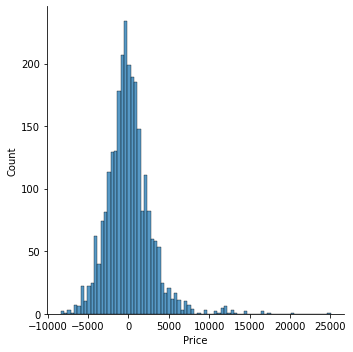

In [ ]:
model_prediciton(LinearRegression())

Training score :0.9563365093792496
Predictions are :[12474.075       6120.47        3559.35571429 ...  7767.42
  6752.18566667  6818.95      ]


r2_score is:0.8139651373400802
MAE:1171.5087733392384
MSE:1171.5087733392384
RMAE:34.227310343338964


FileNotFoundError: ignored

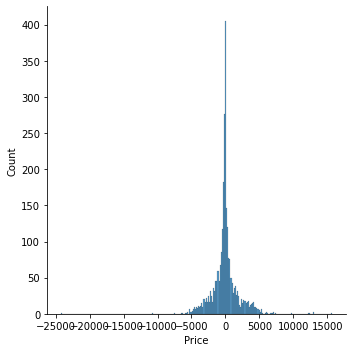

In [ ]:
model_prediciton(RandomForestRegressor(),1)

In [ ]:
data.to_csv("data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')